<a href="https://colab.research.google.com/github/GirijaprasadaMallik/Colab/blob/main/Elephant_Detection_Using_Acoustic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa tensorflow numpy matplotlib


In [ ]:
!pip install librosa tensorflow keras matplotlib numpy


In [ ]:
import librosa
import numpy as np

def extract_features(file_path, n_mfcc=40):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    # Compute the mean of the MFCC features
    return np.mean(mfccs.T, axis=0)


In [ ]:
import os

data = []
labels = []
base_dir = '/content/Dataset'
categories = ['Audio', 'other']  # Class names

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mp3'):  # Process only MP3 files
            file_path = os.path.join(folder_path, file_name)
            features = extract_features(file_path)
            data.append(features)
            labels.append(idx)  # 0 for elephants, 1 for background_noise

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)


In [ ]:
import os

base_dir = '/content/Dataset'
categories = ['Audio', 'other']

for category in categories:
    folder_path = os.path.join(base_dir, category)
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
    else:
        print(f"Found files in {folder_path}:")
        print(os.listdir(folder_path))  # List all files in the folder


Found files in /content/Dataset/Audio:
['elephant-trumpets-growls-6047.mp3', 'elephant-scream-106989.mp3', 'elephant-225994.mp3', 'elephant-58368.mp3']
Found files in /content/Dataset/other:
['intro-music-black-box-trombones-sustain-lite-12394.mp3', 'giropiso-79856.mp3', 'angry-elephant-40916.mp3']


In [ ]:
for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mp3'):  # Process only MP3 files
            file_path = os.path.join(folder_path, file_name)
            try:
                features = extract_features(file_path)
                data.append(features)
                labels.append(idx)  # 0 for Audio, 1 for other
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")


Error processing file /content/Dataset/Audio/elephant-trumpets-growls-6047.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/Audio/elephant-scream-106989.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/Audio/elephant-225994.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/Audio/elephant-58368.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/other/intro-music-black-box-trombones-sustain-lite-12394.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/other/giropiso-79856.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/other/angry-elephant-40916.mp3: 'numpy.ndarray' object has no attribute 'append'


In [ ]:
print(f"Number of samples: {len(data)}")
if len(data) > 0:
    print(f"Shape of first feature set: {data[0].shape}")


Number of samples: 7
Shape of first feature set: (40,)


In [ ]:
import numpy as np

data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")  # Should be (number_of_samples, number_of_features)
print(f"Labels shape: {labels.shape}")  # Should be (number_of_samples,)


Data shape: (7, 40)
Labels shape: (7,)


In [ ]:
features = extract_features('/content/Dataset/Audio/elephant-225994.mp3')
print(f"Features shape: {features.shape}")  # Should match the expected number of features


Features shape: (40,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (5, 40)
Testing data shape: (2, 40)


In [ ]:
print(f"Total samples: {len(data)}")
print(f"Shape of data array: {data.shape}")
print(f"Shape of labels array: {labels.shape}")


Total samples: 7
Shape of data array: (7, 40)
Shape of labels array: (7,)


In [ ]:
def extract_features(file_path, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        return np.mean(mfccs.T, axis=0)  # Return average MFCC features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros(n_mfcc)  # Return zeros if there's an error


In [ ]:
data = []
labels = []
base_dir = '/content/Dataset'
categories = ['Audio', 'other']  # Class names

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mp3'):  # Process only MP3 files
            file_path = os.path.join(folder_path, file_name)
            features = extract_features(file_path)
            data.append(features)
            labels.append(idx)  # 0 for 'Audio', 1 for 'other'

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")


Data shape: (7, 40)
Labels shape: (7,)


In [ ]:
from sklearn.preprocessing import LabelBinarizer


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split



# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (5, 40)
y_train shape: (5, 1)


In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 output classes: 'Audio' and 'other'
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,650 (170.51 KB)

 Trainable params: 43,650 (170.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# prompt: ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 2, 2, 2), output.shape=(None, 2)

import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
!pip install librosa tensorflow numpy matplotlib

!pip install librosa tensorflow keras matplotlib numpy


def extract_features(file_path, n_mfcc=40):
    # Load audio file
    audio, sample_rate = librosa.load(file_path, sr=None)
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    # Compute the mean of the MFCC features
    return np.mean(mfccs.T, axis=0)


data = []
labels = []
base_dir = '/content/Dataset'
categories = ['Audio', 'other']  # Class names

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mp3'):  # Process only MP3 files
            file_path = os.path.join(folder_path, file_name)
            features = extract_features(file_path)
            data.append(features)
            labels.append(idx)  # 0 for elephants, 1 for background_noise

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)


base_dir = '/content/Dataset'
categories = ['Audio', 'other']

for category in categories:
    folder_path = os.path.join(base_dir, category)
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
    else:
        print(f"Found files in {folder_path}:")
        print(os.listdir(folder_path))  # List all files in the folder

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mp3'):  # Process only MP3 files
            file_path = os.path.join(folder_path, file_name)
            try:
                features = extract_features(file_path)
                data.append(features)
                labels.append(idx)  # 0 for Audio, 1 for other
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

print(f"Number of samples: {len(data)}")
if len(data) > 0:
    print(f"Shape of first feature set: {data[0].shape}")


data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")  # Should be (number_of_samples, number_of_features)
print(f"Labels shape: {labels.shape}")  # Should be (number_of_samples,)

features = extract_features('/content/Dataset/Audio/elephant-225994.mp3')
print(f"Features shape: {features.shape}")  # Should match the expected number of features


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

print(f"Total samples: {len(data)}")
print(f"Shape of data array: {data.shape}")
print(f"Shape of labels array: {labels.shape}")

def extract_features(file_path, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        return np.mean(mfccs.T, axis=0)  # Return average MFCC features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros(n_mfcc)  # Return zeros if there's an error

data = []
labels = []
base_dir = '/content/Dataset'
categories = ['Audio', 'other']  # Class names

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mp3'):  # Process only MP3 files
            file_path = os.path.join(folder_path, file_name)
            features = extract_features(file_path)
            data.append(features)
            labels.append(idx)  # 0 for 'Audio', 1 for 'other'

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")




# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Assuming X_train and X_test are your features, and y_train and y_test are your labels

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 output units for 2 classes
])

# Compile the model (this step was missing in your code)
model.compile(
    optimizer='adam',               # Optimizer (Adam is commonly used)
    loss='categorical_crossentropy', # Loss function for multi-class classification
    metrics=['accuracy']            # Metrics to evaluate during training
)

# Train the model
history = model.fit(
    X_train, y_train,               # Training data and labels
    validation_data=(X_test, y_test),  # Validation data for monitoring performance
    epochs=30,                      # Number of epochs to train for
    batch_size=32,                  # Batch size
    verbose=1                       # Display progress during training
)

Found files in /content/Dataset/Audio:
['elephant-trumpets-growls-6047.mp3', 'elephant-scream-106989.mp3', 'elephant-225994.mp3', 'elephant-58368.mp3']
Found files in /content/Dataset/other:
['intro-music-black-box-trombones-sustain-lite-12394.mp3', 'giropiso-79856.mp3', 'angry-elephant-40916.mp3']
Error processing file /content/Dataset/Audio/elephant-trumpets-growls-6047.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/Audio/elephant-scream-106989.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/Audio/elephant-225994.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/Audio/elephant-58368.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/other/intro-music-black-box-trombones-sustain-lite-12394.mp3: 'numpy.ndarray' object has no attribute 'append'
Error processing file /content/Dataset/other/giropiso-79856.mp3: 'nump

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2372
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8000 - loss: 0.3367 - val_accuracy: 1.0000 - val_loss: 0.2359
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8000 - loss: 0.7600 - val_accuracy: 1.0000 - val_loss: 0.0207
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8000 - loss: 12.2743 - val_accuracy: 1.0000 - val_loss: 0.1291
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8000 - loss: 0.7912 - val_accuracy: 0.5000 - val_loss: 1.4450
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8000 - loss: 3.8787 - val_accuracy: 0.0000e+00 - val_loss: 5.0775
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 7.3499
Test Accuracy: 0.00%


In [ ]:
model.save('elephant_detection_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('elephant_detection_model.h5')

# Extract features from a new audio file
new_file_path = '/path_to_new_audio.mp3'
features = extract_features(new_file_path)

# Predict
prediction = model.predict(np.expand_dims(features, axis=0))
print("Prediction:", lb.inverse_transform(prediction))


Error processing /path_to_new_audio.mp3: [Errno 2] No such file or directory: '/path_to_new_audio.mp3'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


<ipython-input-64-a035ed14c10c>:93: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Prediction: [0]


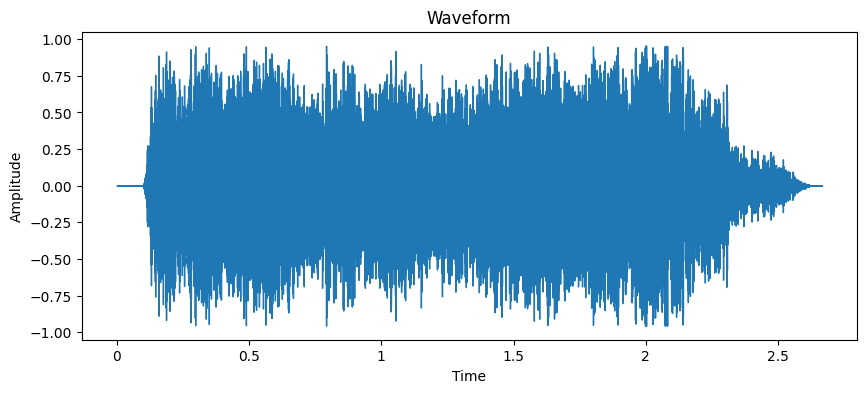

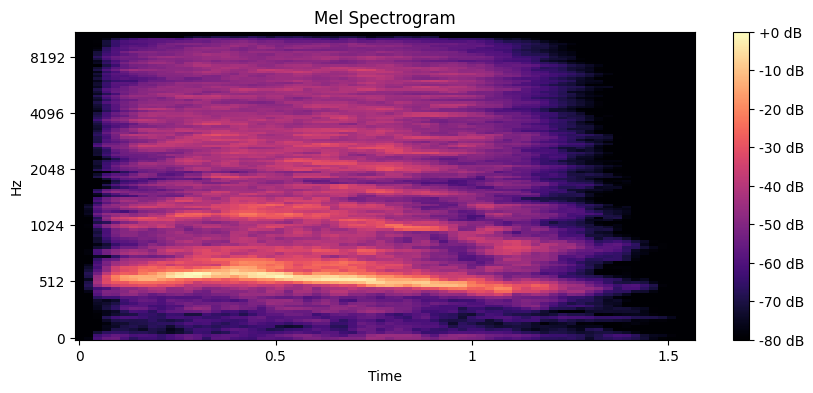

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def plot_spectrogram(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.show()

# Example: Visualize one of your audio files
plot_waveform('/content/Dataset/Audio/elephant-225994.mp3')
plot_spectrogram('/content/Dataset/Audio/elephant-scream-106989.mp3')


## **TESTING**

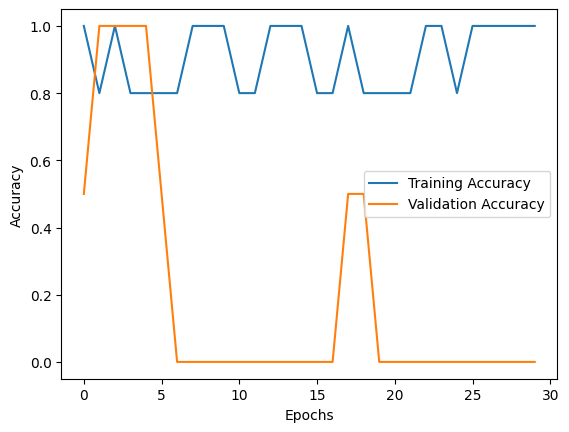

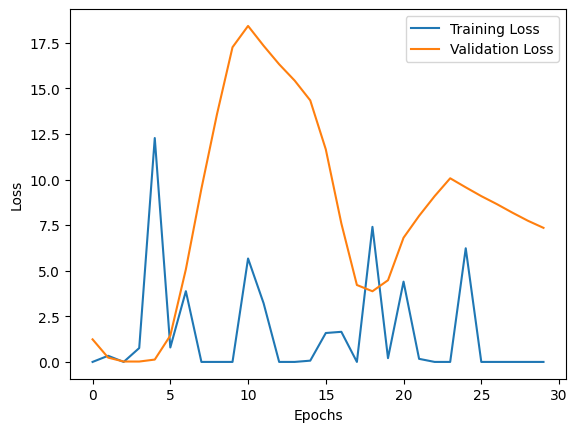

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.0000e+00 - loss: 7.3499
Test Loss: 7.349903583526611
Test Accuracy: 0.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


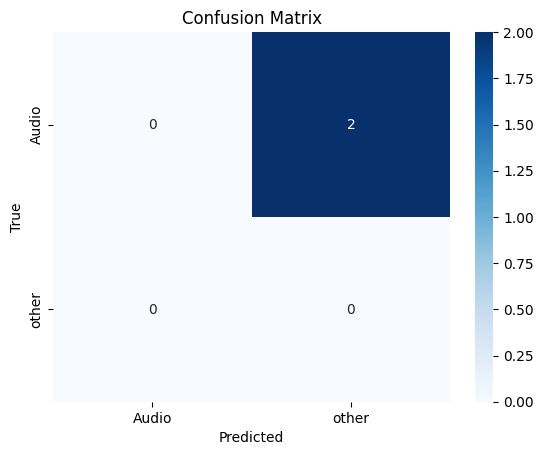

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Load a new audio file for prediction (assuming extract_features is defined)
new_file_path = '/content/Dataset/Audio/elephant-58368.mp3'
new_features = extract_features(new_file_path)

# Reshape the features to match the input shape
new_features = np.reshape(new_features, (1, -1))  # Add batch dimension

# Predict class for the new sample
prediction = model.predict(new_features)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: Audio


In [ ]:
# Load a new audio file for prediction (assuming extract_features is defined)
new_file_path = '//content/Dataset/other/angry-elephant-40916.mp3'
new_features = extract_features(new_file_path)

# Reshape the features to match the input shape
new_features = np.reshape(new_features, (1, -1))  # Add batch dimension

# Predict class for the new sample
prediction = model.predict(new_features)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Class: other
